In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap

In [ ]:
BASE_PATH = os.path.dirname(os.getcwd())
filepath = os.path.join(BASE_PATH, "reports", "descriptors.csv")

descriptors = pd.read_csv(filepath)

In [3]:
descriptors.dataset.apply(len).max()

np.int64(9)

In [4]:
order = {}
for name, group in descriptors.groupby("dataset"):
    l = descriptors.dataset.apply(len).max() + 1
    print(f"{name :10}: {len(group)}")
    order[name] = len(group)

order = {k: v for k, v in sorted(order.items(), key=lambda item: item[1], reverse=True)}

chembl    : 78163
compounds : 22
drugbank  : 11307
enamine   : 49970


In [5]:
order

{'chembl': 78163, 'enamine': 49970, 'drugbank': 11307, 'compounds': 22}

In [6]:
feature_cols = [col for col in descriptors.columns if col not in ["ID", "dataset"]]

X = descriptors.loc[:, feature_cols]
X.shape

(139462, 17)

In [7]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

In [8]:
pca = PCA(n_components=10, random_state=2025)
X_pca = pca.fit_transform(X_sc)

In [9]:
print(pca.explained_variance_ratio_)

[0.35715116 0.15114064 0.12605523 0.10254254 0.06412327 0.05217521
 0.04169769 0.03460552 0.02375064 0.01769305]


In [10]:
pca.explained_variance_ratio_.cumsum()

array([0.35715116, 0.5082918 , 0.63434703, 0.73688956, 0.80101283,
       0.85318804, 0.89488573, 0.92949125, 0.95324189, 0.97093494])

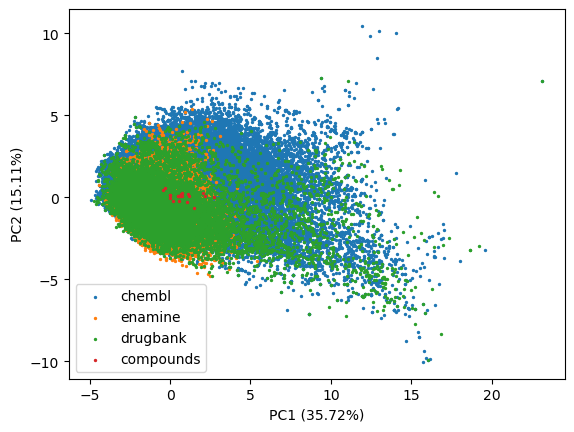

In [12]:
fig = plt.figure()
ax = fig.add_subplot()
for data in order.keys():
    idx = descriptors.query("dataset == @data").index
    ax.scatter(X_pca[idx, 0], X_pca[idx, 1], s=2, label=data)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%})")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%})")
# plt.xlim((-3,3))
plt.legend()
plt.show()

In [17]:
def run_umap(neighbors, dist):
    umap_model = umap.UMAP(metric="euclidean",
                            n_neighbors=neighbors,
                            n_components=2,
                            min_dist=dist,
                            random_state=2025)
    X_umap = umap_model.fit_transform(X_sc)

    fig = plt.figure()
    ax = fig.add_subplot()
    for data in order.keys():
        idx = descriptors.query("dataset == @data").index
        ax.scatter(X_umap[idx, 0], X_umap[idx, 1], s=2, label=data)

    plt.legend()
    plt.show()

/home/freddy/miniconda3/envs/2025_greiner_pseudo-np/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/freddy/miniconda3/envs/2025_greiner_pseudo-np/lib/python3.12/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/freddy/miniconda3/envs/2025_greiner_pseudo-np/lib/python3.12/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/freddy/miniconda3/envs/2025_greiner_pseudo-np/lib/python3.12/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed!

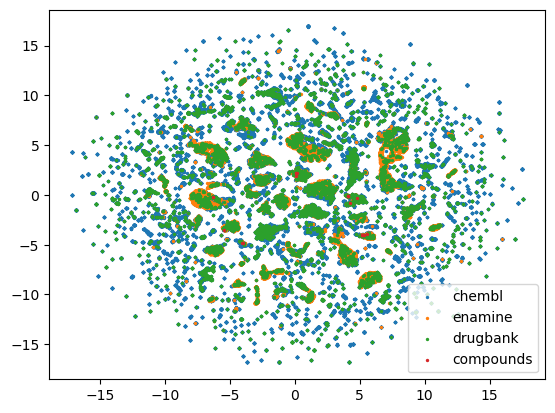

In [18]:
run_umap(10, 0.01)

/home/freddy/miniconda3/envs/2025_greiner_pseudo-np/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/freddy/miniconda3/envs/2025_greiner_pseudo-np/lib/python3.12/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/freddy/miniconda3/envs/2025_greiner_pseudo-np/lib/python3.12/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/freddy/miniconda3/envs/2025_greiner_pseudo-np/lib/python3.12/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed!

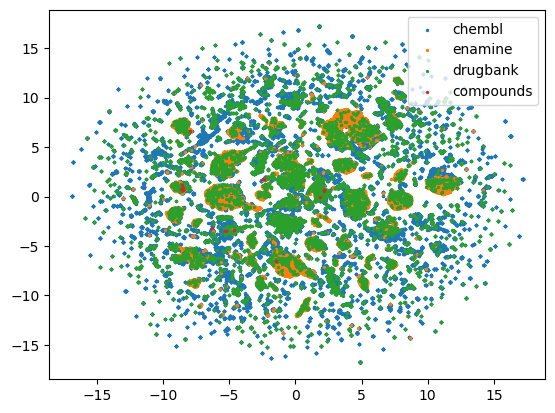

In [19]:
run_umap(10, 0.1)

/home/freddy/miniconda3/envs/2025_greiner_pseudo-np/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/freddy/miniconda3/envs/2025_greiner_pseudo-np/lib/python3.12/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/freddy/miniconda3/envs/2025_greiner_pseudo-np/lib/python3.12/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/freddy/miniconda3/envs/2025_greiner_pseudo-np/lib/python3.12/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed!

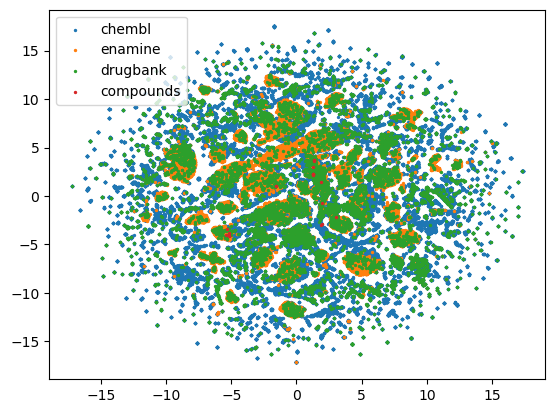

In [20]:
run_umap(10, 0.2)

/home/freddy/miniconda3/envs/2025_greiner_pseudo-np/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


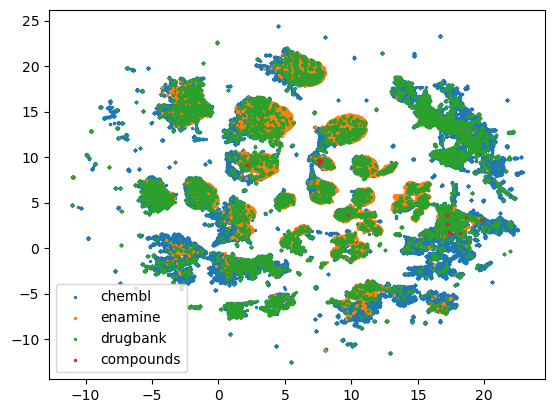

In [21]:
run_umap(20, 0.2)

/home/freddy/miniconda3/envs/2025_greiner_pseudo-np/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


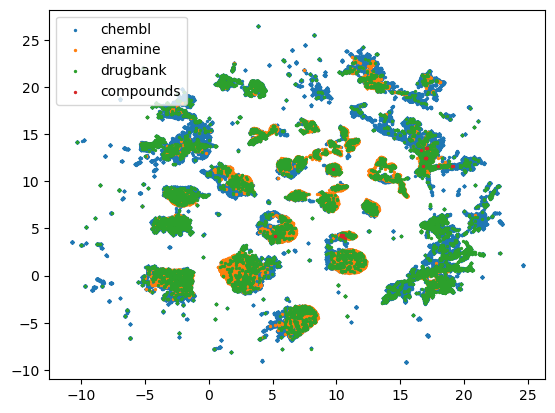

In [22]:
run_umap(20, 0.1)